# Planning Report

## Part 1: Data Description

In [23]:
library(tidyverse)
library(tidymodels)
library(repr)

options(repr.plot.width = 8, repr.plot.height = 6)

In [24]:
players_url <- "https://raw.githubusercontent.com/arian-d1/dsci100_planning_report/refs/heads/main/data/players.csv"
sessions_url <- "https://raw.githubusercontent.com/arian-d1/dsci100_planning_report/refs/heads/main/data/sessions.csv"

In [25]:
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
dim(players)

[1] 196   7

In [27]:
dim(sessions)

[1] 1535    5

In [28]:
head(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [29]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [30]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [31]:
players |>
    group_by(experience) |>
    summarize(count = n())

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [32]:
players |>
    group_by(gender) |>
    summarize(count = n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In [33]:
sessions_mutated <- sessions |>
    mutate(across(start_time:end_time, as_datetime)) |>
    mutate(time_spent_secs = round(as.numeric(end_time - start_time)), 2) |>
    arrange(desc(time_spent_secs))
    
sessions_mutated <- sessions_mutated |>
    mutate(time_spent_hours = round(time_spent_secs / 3600), 2)

head(sessions_mutated)

hashedEmail,start_time,end_time,original_start_time,original_end_time,time_spent_secs,2,time_spent_hours
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2027-06-21 00:22:21,2028-06-21 00:02:40,1.71953e+12,1.71954e+12,31621219,2,8784
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,2003-08-21 00:21:36,2004-08-21 00:01:51,1.72272e+12,1.72274e+12,31621215,2,8784
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2003-08-21 00:22:33,2004-08-21 00:00:51,1.72272e+12,1.72273e+12,31621098,2,8784
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2019-06-21 00:22:44,2020-06-21 00:00:19,1.71884e+12,1.71884e+12,31621055,2,8784
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2015-06-21 00:23:25,2016-06-21 00:00:52,1.71849e+12,1.71850e+12,31621047,2,8784
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,2011-08-21 00:23:39,2012-08-21 00:01:05,1.72342e+12,1.72342e+12,31621046,2,8784


In [34]:
sessions_mutated |>
    select(time_spent_hours) |>
    summarize(mean_hours = round(mean(time_spent_hours, na.rm = TRUE), 2))

mean_hours
<dbl>
7.01


Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics (report values to 2 decimal places), number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

| Variable | Type | Meaning | Issues in Dataset | Non-visible Issues |
|----------|------|---------|-------------------|--------------------|
| experience | Character | Player’s experience level (Beginner, Amateur, Regular, Veteran, Pro) | N/A | May be self-reported, not objectively measured |
| subscribe | Logical | Indicates if the player has an active subscription | Major imbalance (majority are TRUE) | Subscription status may not directly reflect engagement |
| hashedEmail | Character | Anonymized unique player identifier | N/A | N/A |
| played_hours | Numeric | Total hours a player has played | The majority of players have very few, if none, hours played | A few players dominate the averages |
| name | Character | Player’s first name | N/A | N/A |
| gender | Character | Player’s gender (e.g., Male, Female) | N/A | May introduce bias for those who specified vs those who did not|
| Age | Numeric | Player’s age in years | Some values are na | If it's self-reported there may be inconsistencies |


There are 196 unique players in the players dataset in total. The players dataset has 7 variables: experience, subscribe, hashedEmail, played_hours, name, gender, and Age.
  
The mean played_hours is 5.85 hours. The max and min are 223.10 and 0 hours, respectively.  
The mean age is 21.14 hours. The max and min are 58 and 9 years old, respectively.  
The five specified experience classes are Beginner, Amateur, Regular, Veteran, and Pro.  
The 7 specified genders options are Agender, Female, Male, Non-binary, Other, Prefer not to say, Two-Spirited.

| Variable | Type | Meaning | Issues in Dataset | Non-visible Issues |
|----------|------|---------|-------------------|--------------------|
| hashedEmail | Character | Identifier linking session to player | None visible | N/A |
| start_time | Character | Timestamp when session began | N/A | N/A |
| end_time | Character | Timestamp when session ended | N/A | Some sessions may be logged incorrectly if app crashed or disconnected |
| original_start_time | Double | Original unadjusted session start time | N/A | N/A |
| original_end_time | Double | Original unadjusted session end time | N/A | N/A |

There are 1585 unique player sessions in the sessions dataset. The sessions datafame has 5 variables: hashedEmail, start_time, end_time, original_start_time, and original_end_time.  

The mean session length is 7.01 hours.

## Part 2: Questions

Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

The broad question I will address is how player characteristics and in-game behaviours relate to the likelihood of subscribing to a game-related newsletter. More specifically, "can player characteristics (such as experience level, age, and gender) and behaviours (such as total hours played) predict whether a player subscribes to the game-related newsletter?". The response variable of interest is "subscribe", which indicates whether a player has an active newsletter subscription or not. The explanatory variables are "experience", "played_hours", "Age", and "gender". The dataset provides us with information about the players themselves and their behaviours. This allows us to explore whether more engaged or experienced players are more likely to subscribe and based primarily on what features. To prepare the data for analysis, I will address missing age values, manage the class imbalance in the subscribe variable with stratification, convert categorical variables (like experience and gender) to factors, and remove identifiers such as hashedEmail and name. After cleaning and transforming the data, I will apply predictive methods such as k-NN classifcation to identify which features are most strongly associated with newsletter subscription.

## Part 3: Exploratory Data Analysis and Visualization

1. Demonstrate that the dataset can be loaded into R.
2. Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
3. Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
4. Make a few exploratory visualizations of the data to help you understand it.
5. Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
6. Explain any insights you gain from these plots that are relevant to address your question

In [35]:
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [36]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Age has 2 NA values, other tham that the data is in a tidy format. We just have to now ensure to use na.rm = TRUE in our calculations to avoid returning NA values.

In [37]:
players_means <- players |>
    select(Age, played_hours) |>
    summarize(mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours)) |>
    round(2)

players_means

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


| Variable | Mean Value | Units |
|----------|------------|--------|
| Age | 21.14 | Years |
| played_hours | 5.85 | Hours|

### Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


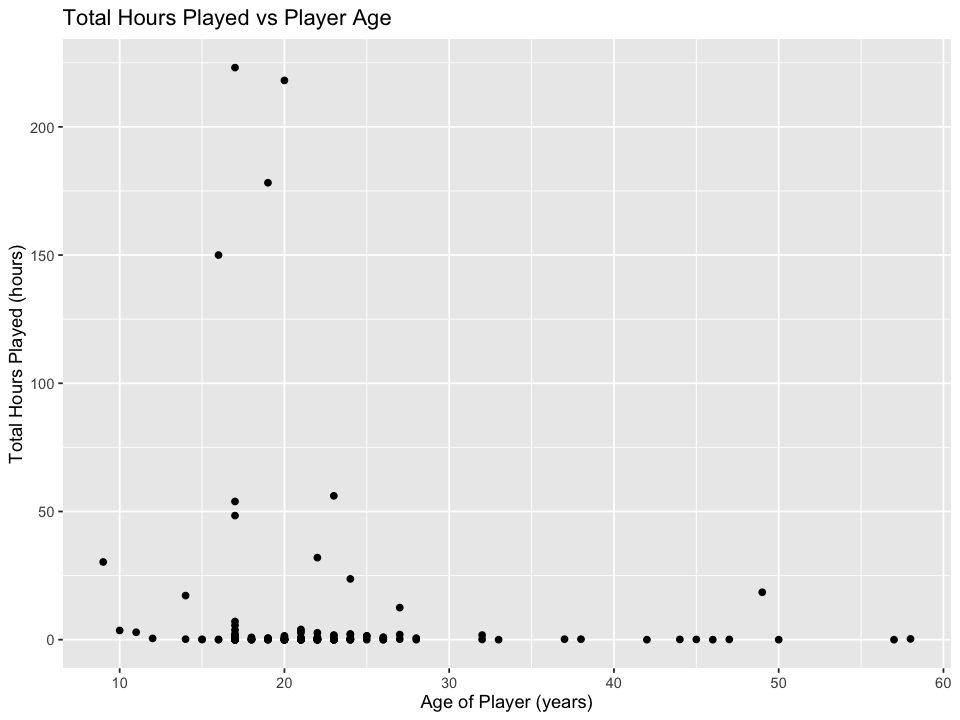

In [38]:
age_hours_plot <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Age of Player (years)", y = "Total Hours Played (hours)", title = "Total Hours Played vs Player Age")

age_hours_plot

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


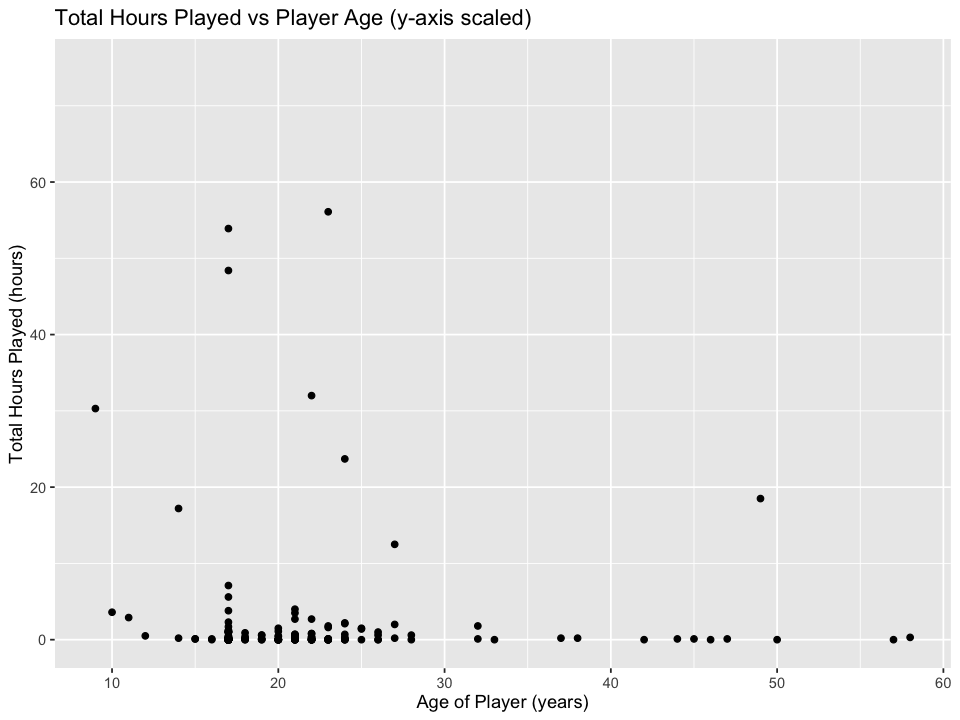

In [39]:
age_hours_plot_scaled <- age_hours_plot +
    scale_y_continuous(limits = c(0, 75)) +
    labs(title = "Total Hours Played vs Player Age (y-axis scaled)")

age_hours_plot_scaled

In the unscaled graph, we can see that there are a few people whose played_hours are much larger than the mean, but once we shrink the y scale down, we see that the majority of players fall in the range of those with 0 <= played_hours <= 20.

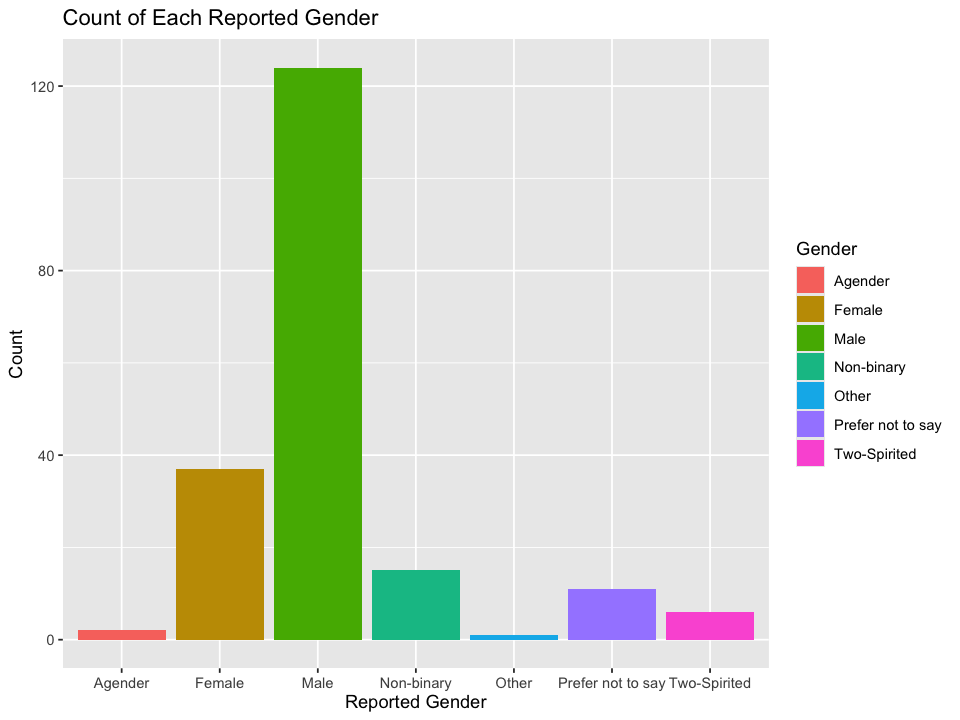

In [40]:
gender_plot <- players |>
    ggplot(aes(x = gender, fill = gender)) +
    geom_bar(stat = 'count') +
    labs(x = "Reported Gender", y = "Count", title = "Count of Each Reported Gender",
        fill = "Gender")

gender_plot


The dominating majority of players were those who self-reported their gender as being male followed by female and non-binary.


## Part 4: Methods and Plan